#  Статистика

**Условие**

Имеются 3 файла. В каждом из них содержатся данные, которые необходимо исследовать.

С помощью методов выравнивания статистических рядов подобрать теоретическое распределение. Проверить гипотезы о соответствии закона распределения имеющихся данных теоретическому. (Проверить стандартные распределения, которые использовались раньше: геометрическое, биномиальное, Пуассона, равномерное, нормальное, экспоненциальное).

Выполнить статистическое исследование(построение графиков(ГИСТОГРАММА 100% - без нее сразу 0), точечных, интервальных оценок, p-value).  
Постарайтесь подойти творчески и сделать лабораторную красивой.

В качестве теоретического можно использовать генератор случайных величин из стандартной библиотеки того языка программирования, на котором будет выполняться работа, если это необходимо.


**Требования к работе:**

Реализовать все используемые методы (если будет использовано что-то из библиотек, то придется во время сдачи писать самому ручками, а время-то ограничено..).

чистый код (по аналогии с предыдущим пунктом - в случае плохого кода придется переписывать во время сдачи)

**Пожелания к работе:**

Использовать Python и Jupyter Notebook (https://jupyter.org/)

Описание того, что вы делали

In [1]:
#основные библиотеки, которые понадобятся
import numpy as np
import matplotlib.pyplot as plt
import tool
from scipy.stats import chi2

In [2]:
file_name = "set_1.csv"
arr = tool.get_arr(file_name, int)
arr

[3,
 1,
 1,
 9,
 8,
 7,
 3,
 5,
 5,
 2,
 4,
 1,
 2,
 2,
 2,
 1,
 1,
 3,
 1,
 1,
 1,
 3,
 5,
 1,
 1,
 13,
 3,
 4,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 4,
 2,
 11,
 1,
 2,
 8,
 2,
 2,
 4,
 2,
 3,
 2,
 3,
 5,
 1,
 4,
 5,
 3,
 2,
 3,
 15,
 1,
 2,
 7,
 2,
 1,
 1,
 3,
 4,
 3,
 1,
 1,
 5,
 3,
 10,
 3,
 1,
 8,
 1,
 7,
 8,
 3,
 5,
 5,
 2,
 2,
 2,
 1,
 7,
 6,
 1,
 1,
 4,
 2,
 3,
 1,
 6,
 3,
 9,
 1,
 1,
 5,
 2,
 4,
 2,
 1,
 2,
 3,
 2,
 9,
 3,
 2,
 14,
 6,
 1,
 1,
 7,
 1,
 3,
 3,
 4,
 3,
 10,
 5,
 1,
 2,
 3,
 7,
 6,
 16,
 1,
 1,
 1,
 3,
 5,
 1,
 2,
 1,
 6,
 4,
 2,
 1,
 2,
 9,
 1,
 1,
 2,
 1,
 2,
 7,
 1,
 2,
 10,
 1,
 1,
 1,
 3,
 3,
 2,
 8,
 3,
 1,
 4,
 1,
 3,
 11,
 8,
 2,
 4,
 5,
 8,
 2,
 5,
 1,
 2,
 7,
 1,
 4,
 2,
 1,
 11,
 8,
 2,
 2,
 1,
 6,
 2,
 2,
 1,
 1,
 6,
 1,
 5,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 4,
 3,
 4,
 1,
 2,
 10,
 1,
 5,
 4,
 2,
 1,
 3,
 4,
 1,
 4,
 2,
 1,
 9,
 2,
 2,
 1,
 6,
 2,
 5,
 13,
 1,
 1,
 3,
 5,
 2,
 1,
 7,
 1,
 1,
 6,
 1,
 2,
 4,
 1,
 5,
 5,
 2,
 3,
 4,
 1,
 5,
 6,
 8,
 1,
 1,
 3,


In [3]:
n = len(arr)
n

100000

In [4]:
variation_series = {}
for num in arr:
    variation_series[num] = variation_series.get(num, 0) + 1
variation_series


{3: 14589,
 1: 29797,
 9: 1719,
 8: 2469,
 7: 3527,
 5: 7098,
 2: 20669,
 4: 10484,
 13: 413,
 11: 969,
 15: 206,
 10: 1310,
 6: 5052,
 14: 300,
 16: 163,
 17: 105,
 30: 42,
 20: 29,
 12: 614,
 21: 23,
 44: 2,
 18: 78,
 29: 55,
 28: 91,
 27: 5,
 22: 16,
 19: 48,
 24: 14,
 32: 26,
 31: 26,
 37: 1,
 33: 16,
 25: 5,
 34: 11,
 42: 1,
 39: 2,
 23: 8,
 35: 3,
 38: 4,
 36: 7,
 47: 1,
 66: 1,
 26: 1}

In [5]:
sorted_tuple = sorted(variation_series.items(), key=lambda x: x[0])
variation_series = dict(sorted_tuple)
variation_series

{1: 29797,
 2: 20669,
 3: 14589,
 4: 10484,
 5: 7098,
 6: 5052,
 7: 3527,
 8: 2469,
 9: 1719,
 10: 1310,
 11: 969,
 12: 614,
 13: 413,
 14: 300,
 15: 206,
 16: 163,
 17: 105,
 18: 78,
 19: 48,
 20: 29,
 21: 23,
 22: 16,
 23: 8,
 24: 14,
 25: 5,
 26: 1,
 27: 5,
 28: 91,
 29: 55,
 30: 42,
 31: 26,
 32: 26,
 33: 16,
 34: 11,
 35: 3,
 36: 7,
 37: 1,
 38: 4,
 39: 2,
 42: 1,
 44: 2,
 47: 1,
 66: 1}

In [6]:
sum = 0
for i in variation_series.values():
    sum += i       
sum

100000

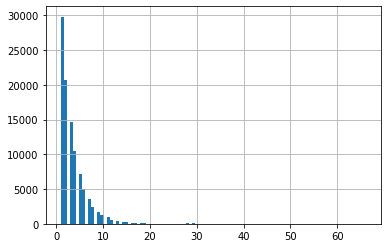

In [7]:
plt.hist(arr, 100)
plt.grid()

In [8]:
m = tool.get_expectation(arr)
m

3.44078

In [9]:
D = tool.get_dispersion(arr)
D

10.048293474525257

33.25059655219652

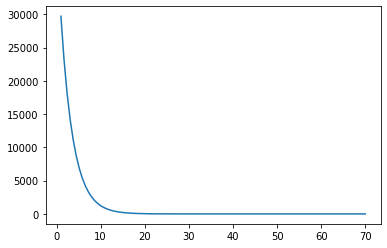

In [10]:
p = 1/m +0.0065
p
x = np.linspace(1, 70, 100)
y = tool.f_geom(x, p) * n
plt.plot(x, y)
critical_chi2 = chi2.ppf(0.2, len(variation_series) - 2)
critical_chi2

In [11]:
ch2 = 0
npi = 0
for key, value in variation_series.items():
    if key >= 21:
        break
    npi = n * tool.f_geom(key, p)
    tmp = (value - npi)**2
    ch2 += tmp / npi

In [12]:
ch2

30.754800153302092

In [13]:
tool.get_mean_confidence_interval(arr, 0.99)

(3.4174599247890867, 3.4641000752109137)

In [14]:
tool.get_standard_deviation_conf_interval(arr, 0.99)

(3.151744170607227, 3.188260899148961)